#### Explanation of some columns
- Age : Age of the patient
- Sex : Sex of the patient
- exng: exercise induced angina (1 = yes; 0 = no)
- cp: number of major vessels (0-3)
- caa : Chest Pain type chest pain type 
    - Value 0: none
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
- trtbps : resting blood pressure (in mm Hg) 
- chol : cholestoral in mg/dl fetched via BMI sensor
- fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg : resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalachh : maximum heart rate achieved
- target : 0= less chance of heart attack 1= more chance of heart attack

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform, randint

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import lightgbm as ltb
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.shape

(303, 14)

In [4]:
data.info() ## no missing values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
data.describe(include='all')  ## description of all data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
data[data['output']==1].describe()  ## description of all data where peaple have more chance of heart attack 

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.0
mean,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212,1.0
std,9.550651,0.497444,0.952222,16.169613,53.552872,0.347412,0.504818,19.174276,0.347412,0.780683,0.593635,0.848894,0.465752,0.0
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,44.000000,0.000000,1.000000,120.000000,208.000000,0.000000,0.000000,149.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.0
50%,52.000000,1.000000,2.000000,130.000000,234.000000,0.000000,1.000000,161.000000,0.000000,0.200000,2.000000,0.000000,2.000000,1.0
75%,59.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,172.000000,0.000000,1.000000,2.000000,0.000000,2.000000,1.0
max,76.000000,1.000000,3.000000,180.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,2.000000,4.000000,3.000000,1.0


In [7]:
data.output.mean()  ## 54,45 percent of patients have an increased risk of heart attack

0.5445544554455446

In [8]:
data['sex'].mean() 

0.6831683168316832

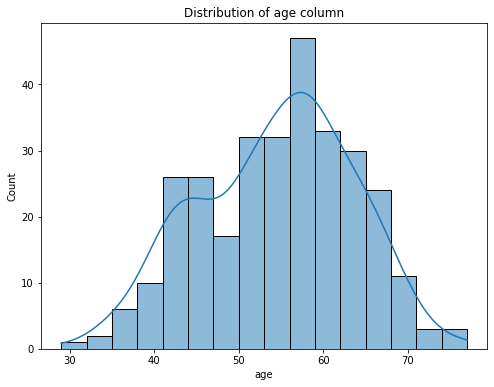

In [9]:
plt.figure(figsize=[8,6])
sns.histplot(data.age, binwidth=3, kde=True)
plt.title('Distribution of age column')
plt.show()

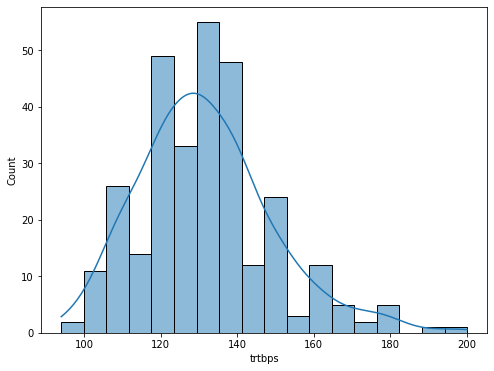

In [10]:
plt.figure(figsize=[8,6])
sns.histplot(data.trtbps, kde=True)
plt.show()

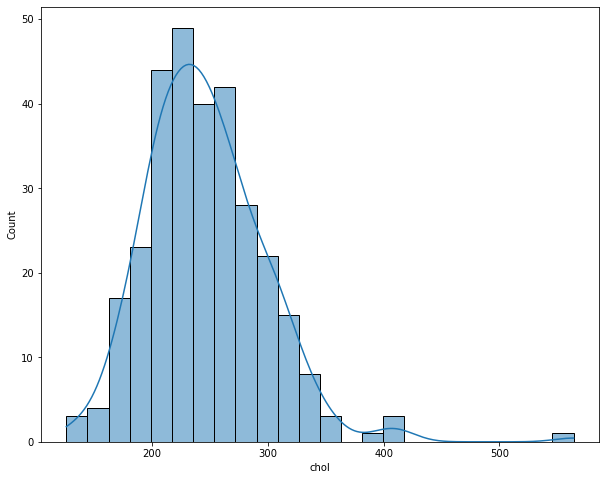

In [11]:
plt.figure(figsize=[10,8])
sns.histplot(data.chol, kde=True)
plt.show()

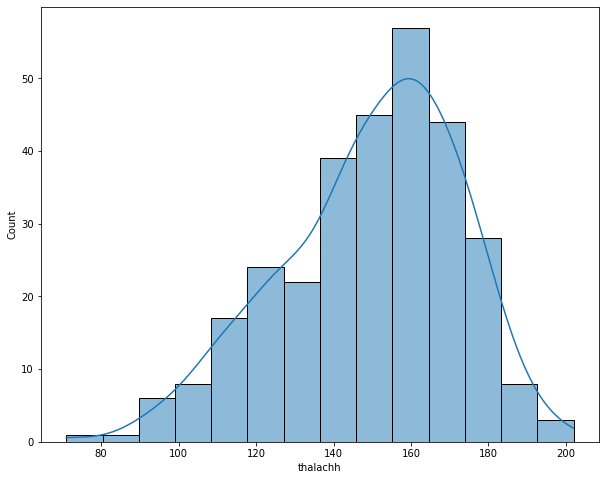

In [12]:
plt.figure(figsize=[10,8])
sns.histplot(data.thalachh, kde=True)
plt.show()

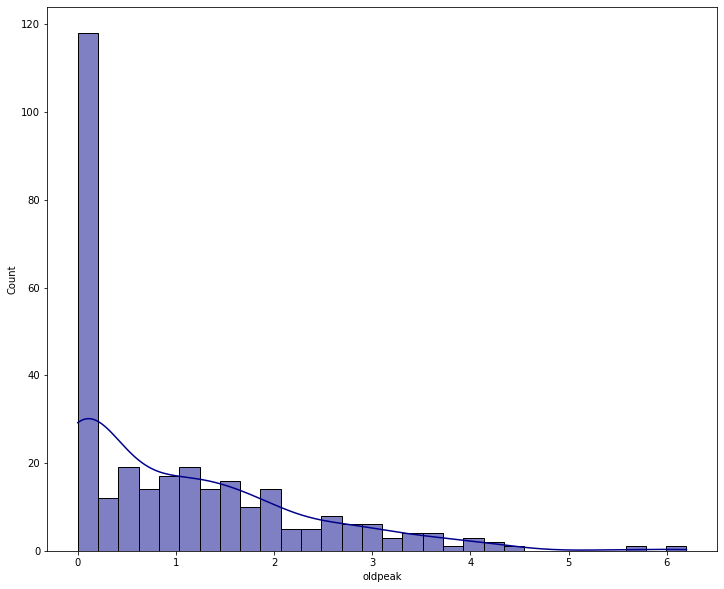

In [13]:
plt.figure(figsize=[12,10])
sns.histplot(data.oldpeak, bins=30, kde=True, color='darkblue')
plt.show()

### Classification modeling   

**One-hot encoding and standardization**

In [14]:
#division of the dataset 
categorical = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
numerical = ["age","trtbps","chol","thalachh","oldpeak"]

# one-hot encoding
data = pd.get_dummies(data, columns = categorical, drop_first=True)

# defining the features and target
X = data.drop(['output'], axis=1)
y = data['output']

# instantiating the scaler
scaler = StandardScaler()

# scaling the continuous featuree
X[numerical] = scaler.fit_transform(X[numerical])

In [15]:
X.head(10)

,age,trtbps,chol,thalachh,oldpeak,sex_1,exng_1,caa_1,caa_2,caa_3,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0
5,0.290464,0.478391,-1.048678,-0.072018,-0.551783,1,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
6,0.180175,0.478391,0.922521,0.146634,0.224643,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
7,-1.143291,-0.663867,0.323431,1.021244,-0.896862,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
8,-0.260980,2.306004,-0.913400,0.540209,-0.465514,1,0,0,0,0,...,1,0,1,1,0,0,1,0,0,1
9,0.290464,1.049520,-1.512490,1.064975,0.483451,1,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=123)

**Simple Decision Tree with visualization**

In [17]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [18]:
accuracy_score(y_test, model.predict(X_test))

0.7540983606557377

In [19]:
f1_score(y_test, model.predict(X_test))

0.7457627118644068

In [20]:
model.predict_proba(X_test)[:15]

array([[0.06666667, 0.93333333],
       [0.93548387, 0.06451613],
       [0.93548387, 0.06451613],
       [1.        , 0.        ],
       [0.06666667, 0.93333333],
       [0.93548387, 0.06451613],
       [0.06666667, 0.93333333],
       [0.54054054, 0.45945946],
       [0.29166667, 0.70833333],
       [0.06666667, 0.93333333],
       [0.54054054, 0.45945946],
       [0.54054054, 0.45945946],
       [0.93548387, 0.06451613],
       [0.93548387, 0.06451613],
       [0.54054054, 0.45945946]])

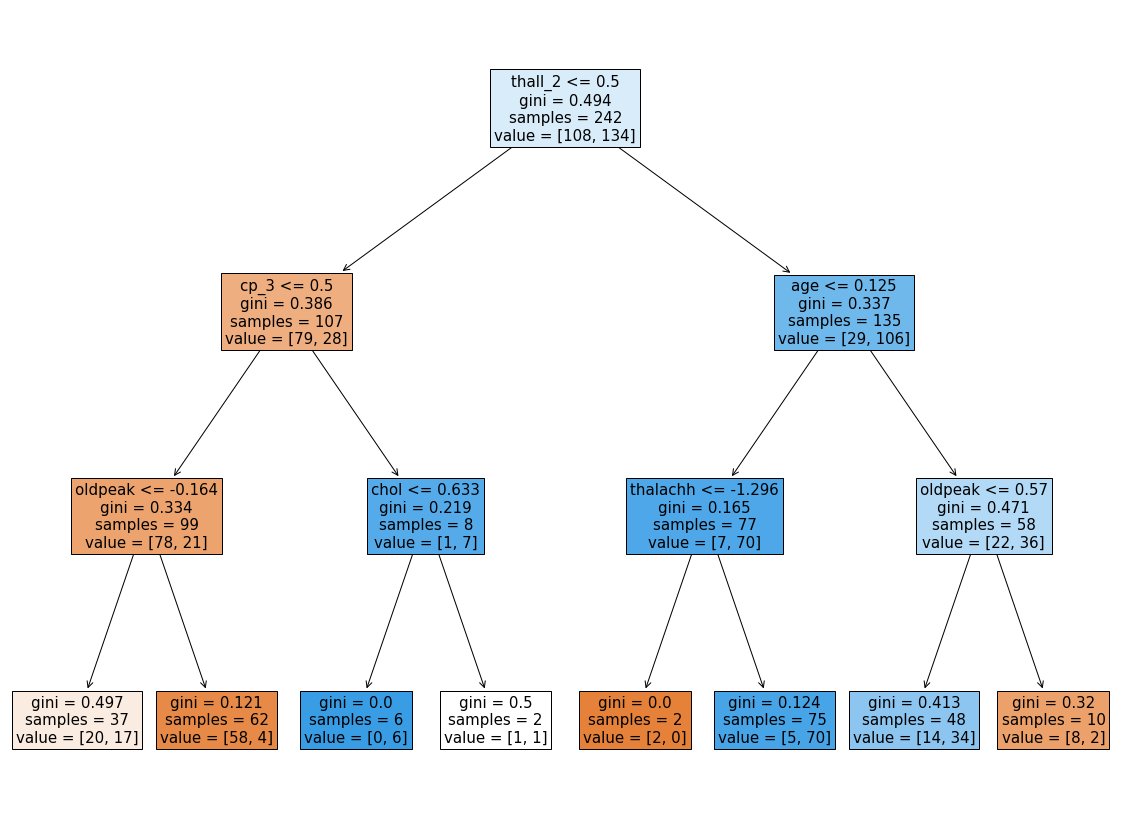

In [21]:
plt.figure(figsize=(20,15))
plot_tree(model, feature_names=X_train.columns, fontsize=15, filled=True)
plt.show()

**Cross validations**

In [22]:
X_train_val, X_val, y_train_val, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [23]:
model = DecisionTreeClassifier()
cross_val_score(model, X_train_val, y_train_val,
                scoring='accuracy', cv = 10, n_jobs=-1)

array([0.65      , 0.8       , 0.75      , 0.73684211, 0.78947368,
       0.78947368, 0.89473684, 0.63157895, 0.52631579, 0.89473684])

In [24]:
cross_val_score(model, X_train, y_train,
                scoring='accuracy', cv = 10, n_jobs=-1).mean()

0.7231666666666666

In [25]:
model.fit(X_train_val, y_train_val)

DecisionTreeClassifier()

In [26]:
accuracy_score(y_val, model.predict(X_val))

0.7142857142857143

In [27]:
f1_score(y_val, model.predict(X_val))

0.7307692307692308

**Decision Tree with Pipeline**

In [28]:
model = Pipeline([("model", DecisionTreeClassifier(criterion='entropy'))])

param_grid = {'model__ccp_alpha':[0.01,0.05,0.1,0.25,0.5,0.75,1],
              'model__max_depth':[1,2,3,5,7,10,15],
              'model__min_samples_split':[1,2,3,4,5],
              "model__min_samples_leaf":[5,10,20,30,50,100]}

optimizer = GridSearchCV(model, param_grid, scoring='accuracy', cv=5 ,n_jobs=-1)

optimizer.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        DecisionTreeClassifier(criterion='entropy'))]),
             n_jobs=-1,
             param_grid={'model__ccp_alpha': [0.01, 0.05, 0.1, 0.25, 0.5, 0.75,
                                              1],
                         'model__max_depth': [1, 2, 3, 5, 7, 10, 15],
                         'model__min_samples_leaf': [5, 10, 20, 30, 50, 100],
                         'model__min_samples_split': [1, 2, 3, 4, 5]},
             scoring='accuracy')

In [29]:
optimizer.feature_names_in_

array(['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'sex_1', 'exng_1',
       'caa_1', 'caa_2', 'caa_3', 'caa_4', 'cp_1', 'cp_2', 'cp_3',
       'fbs_1', 'restecg_1', 'restecg_2', 'slp_1', 'slp_2', 'thall_1',
       'thall_2', 'thall_3'], dtype=object)

In [30]:
optimizer.best_params_

{'model__ccp_alpha': 0.01,
 'model__max_depth': 1,
 'model__min_samples_leaf': 5,
 'model__min_samples_split': 2}

In [31]:
optimizer.best_score_

0.7646258503401361

In [32]:
accuracy_score(y_test, optimizer.predict(X_test))

0.7704918032786885

In [33]:
f1_score(y_test, optimizer.predict(X_test))

0.7741935483870968

In [34]:
optimizer.predict_proba(X_test)[:15]

array([[0.21481481, 0.78518519],
       [0.73831776, 0.26168224],
       [0.73831776, 0.26168224],
       [0.21481481, 0.78518519],
       [0.21481481, 0.78518519],
       [0.73831776, 0.26168224],
       [0.21481481, 0.78518519],
       [0.73831776, 0.26168224],
       [0.21481481, 0.78518519],
       [0.21481481, 0.78518519],
       [0.73831776, 0.26168224],
       [0.73831776, 0.26168224],
       [0.73831776, 0.26168224],
       [0.73831776, 0.26168224],
       [0.73831776, 0.26168224]])

**Logistic Regression**

In [35]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)
accuracy_score(y_test, model.predict(X_test))

0.8032786885245902

In [36]:
%%time

model = Pipeline([("model", LogisticRegression(max_iter=500))])

param_grid = {'model__penalty':['l1','l2'],
              'model__C':[0.01, 0.1, 0.2, 0.25, 0.3, 0.5, 0.75, 1],
              'model__solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

optimizer = GridSearchCV(model, param_grid, scoring='accuracy', cv=10 ,n_jobs=-1)

optimizer.fit(X_train, y_train)

Wall time: 2.45 s


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('model',
                                        LogisticRegression(max_iter=500))]),
             n_jobs=-1,
             param_grid={'model__C': [0.01, 0.1, 0.2, 0.25, 0.3, 0.5, 0.75, 1],
                         'model__penalty': ['l1', 'l2'],
                         'model__solver': ['newton-cg', 'lbfgs', 'liblinear',
                                           'sag', 'saga']},
             scoring='accuracy')

In [37]:
optimizer.best_estimator_

Pipeline(steps=[('model',
                 LogisticRegression(C=1, max_iter=500, penalty='l1',
                                    solver='saga'))])

In [38]:
optimizer.best_params_

{'model__C': 1, 'model__penalty': 'l1', 'model__solver': 'saga'}

In [39]:
optimizer.best_score_

0.8718333333333333

In [40]:
accuracy_score(y_test, optimizer.predict(X_test))

0.7540983606557377

In [41]:
f1_score(y_test, optimizer.predict(X_test))

0.7540983606557377

**Logistic Regression with polynomial features**

In [42]:
%%time

model = Pipeline([('poly', PolynomialFeatures(include_bias=False)), 
                  ("model", LogisticRegression(max_iter=500))
                 ])

param_grid = {'poly__degree':[1,2,3], 
              'model__penalty':['l1','l2'],
              'model__C':[0.01, 0.1, 0.2, 0.25, 0.3, 0.5, 0.75, 1],
              'model__solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

optimizer = GridSearchCV(model, param_grid, scoring='accuracy', cv=10 ,n_jobs=-1)

optimizer.fit(X_train, y_train)

Wall time: 9min 21s


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('poly',
                                        PolynomialFeatures(include_bias=False)),
                                       ('model',
                                        LogisticRegression(max_iter=500))]),
             n_jobs=-1,
             param_grid={'model__C': [0.01, 0.1, 0.2, 0.25, 0.3, 0.5, 0.75, 1],
                         'model__penalty': ['l1', 'l2'],
                         'model__solver': ['newton-cg', 'lbfgs', 'liblinear',
                                           'sag', 'saga'],
                         'poly__degree': [1, 2, 3]},
             scoring='accuracy')

In [43]:
optimizer.best_estimator_

Pipeline(steps=[('poly', PolynomialFeatures(degree=1, include_bias=False)),
                ('model',
                 LogisticRegression(C=1, max_iter=500, penalty='l1',
                                    solver='saga'))])

In [44]:
optimizer.best_params_

{'model__C': 1,
 'model__penalty': 'l1',
 'model__solver': 'saga',
 'poly__degree': 1}

In [45]:
optimizer.best_score_

0.8718333333333333

In [46]:
accuracy_score(y_test, optimizer.predict(X_test))

0.7540983606557377

In [47]:
f1_score(y_test, optimizer.predict(X_test))

0.7540983606557377

**Logistic Regression with polynomial features set to degree = 3**

In [48]:
%%time

model = Pipeline([('poly', PolynomialFeatures(degree=3, include_bias=False)), 
                  ("model", LogisticRegression(max_iter=500))
                 ])

param_grid = {'model__penalty':['l1','l2'],
              'model__C':[0.01, 0.1, 0.2, 0.25, 0.3, 0.5, 0.75, 1],
              'model__solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

optimizer = GridSearchCV(model, param_grid, scoring='accuracy', cv=10 ,n_jobs=-1)

optimizer.fit(X_train, y_train)

Wall time: 10min 20s


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('poly',
                                        PolynomialFeatures(degree=3,
                                                           include_bias=False)),
                                       ('model',
                                        LogisticRegression(max_iter=500))]),
             n_jobs=-1,
             param_grid={'model__C': [0.01, 0.1, 0.2, 0.25, 0.3, 0.5, 0.75, 1],
                         'model__penalty': ['l1', 'l2'],
                         'model__solver': ['newton-cg', 'lbfgs', 'liblinear',
                                           'sag', 'saga']},
             scoring='accuracy')

In [49]:
optimizer.best_estimator_

Pipeline(steps=[('poly', PolynomialFeatures(degree=3, include_bias=False)),
                ('model',
                 LogisticRegression(C=0.01, max_iter=500, solver='newton-cg'))])

In [50]:
optimizer.best_params_

{'model__C': 0.01, 'model__penalty': 'l2', 'model__solver': 'newton-cg'}

In [51]:
optimizer.best_score_

0.8471666666666667

In [52]:
accuracy_score(y_test, optimizer.predict(X_test))

0.819672131147541

In [53]:
f1_score(y_test, optimizer.predict(X_test))

0.819672131147541

Logistic regression model gave best score with polynomial features degree set on 1. </br>
However, best accuracy score on test data was in model with degree set on 3

**Support Vector Machine**

In [54]:
model = LinearSVC()
model.fit(X_train, y_train)
accuracy_score(y_test, model.predict(X_test))

0.7704918032786885

In [55]:
model = SVC(C=0.5, kernel='rbf')
model.fit(X_train, y_train)
accuracy_score(y_test, model.predict(X_test))

0.8524590163934426

In [56]:
model = Pipeline([("model", SVC())])

param_grid = {'model__kernel':['rbf','linear','poly', 'sigmoid'],
              'model__C':[0.01, 0.1, 0.2, 0.25, 0.3, 0.5, 0.75, 1],
              'model__degree':[2,3,4], 
              'model__gamma':['scale','auto']}

optimizer = GridSearchCV(model, param_grid, scoring='accuracy', cv=5 ,n_jobs=-1)

optimizer.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('model', SVC())]), n_jobs=-1,
             param_grid={'model__C': [0.01, 0.1, 0.2, 0.25, 0.3, 0.5, 0.75, 1],
                         'model__degree': [2, 3, 4],
                         'model__gamma': ['scale', 'auto'],
                         'model__kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
             scoring='accuracy')

In [57]:
optimizer.best_params_

{'model__C': 0.2,
 'model__degree': 2,
 'model__gamma': 'scale',
 'model__kernel': 'linear'}

In [58]:
optimizer.best_score_

0.851530612244898

In [59]:
accuracy_score(y_test, optimizer.predict(X_test))

0.7868852459016393

In [60]:
f1_score(y_test, optimizer.predict(X_test))

0.7796610169491526

**Random Forest**

In [61]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
accuracy_score(y_test, model.predict(X_test))

0.7540983606557377

In [62]:
model = Pipeline([("model", AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='gini', 
                                                                                     max_depth=10,
                                                                                     min_samples_leaf=5, 
                                                                                     min_samples_split=3)))])
                                                                                     
param_grid = {'model__n_estimators':[50,100,200,300,400,500], 
              'model__learning_rate':[0.01, 0.1, 0.25, 0.5, 0.75,1], 
              'model__algorithm' : ['SAMME.R','SAMME']                          
}

optimizer = GridSearchCV(model, param_grid, scoring='accuracy', cv=5 ,n_jobs=-1)

optimizer.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                                                                 min_samples_leaf=5,
                                                                                                 min_samples_split=3)))]),
             n_jobs=-1,
             param_grid={'model__algorithm': ['SAMME.R', 'SAMME'],
                         'model__learning_rate': [0.01, 0.1, 0.25, 0.5, 0.75,
                                                  1],
                         'model__n_estimators': [50, 100, 200, 300, 400, 500]},
             scoring='accuracy')

In [63]:
optimizer.best_params_

{'model__algorithm': 'SAMME.R',
 'model__learning_rate': 0.01,
 'model__n_estimators': 50}

In [64]:
optimizer.best_score_

0.8186224489795919

In [65]:
accuracy_score(y_test, optimizer.predict(X_test))

0.7704918032786885

In [66]:
f1_score(y_test, optimizer.predict(X_test))

0.7812499999999999

**Bayes**

In [67]:
model = BernoulliNB()
model.fit(X_train, y_train)
accuracy_score(y_test, model.predict(X_test))

0.8524590163934426

In [68]:
model = Pipeline([("model", BernoulliNB())])

param_grid = {'model__alpha':[0.001, 0.01,0.05,0.1,0.25,0.5,0.75,1]}

optimizer = GridSearchCV(model, param_grid, scoring='accuracy', cv=5 ,n_jobs=-1)

optimizer.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('model', BernoulliNB())]),
             n_jobs=-1,
             param_grid={'model__alpha': [0.001, 0.01, 0.05, 0.1, 0.25, 0.5,
                                          0.75, 1]},
             scoring='accuracy')

In [69]:
optimizer.best_params_

{'model__alpha': 0.001}

In [70]:
optimizer.best_score_

0.8310374149659865

In [71]:
accuracy_score(y_test, optimizer.predict(X_test))

0.8360655737704918

In [72]:
f1_score(y_test, optimizer.predict(X_test))

0.8275862068965517

**KNeighbors**

In [73]:
model = KNeighborsClassifier(n_neighbors=10, weights='distance', leaf_size=10, p = 2, )
model.fit(X_train[numerical], y_train)

KNeighborsClassifier(leaf_size=10, n_neighbors=10, weights='distance')

I use only numerical columns because K near neighbours model isn't made for categorical features 

In [74]:
accuracy_score(y_test, model.predict(X_test[numerical]))

0.7377049180327869

In [75]:
f1_score(y_test, model.predict(X_test[numerical]))

0.7500000000000001

In [76]:
model = Pipeline([("model", KNeighborsClassifier())])

param_grid = {'model__n_neighbors':[3,5,7,9,11,13,15],
              'model__weights':['uniform','distance'],
              'model__algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
              'model__leaf_size':[5,10,20,30,40,50], 
              'model__p':[1,2]}

optimizer = GridSearchCV(model, param_grid, scoring='accuracy', cv=5 ,n_jobs=-1)

optimizer.fit(X_train[numerical], y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'model__algorithm': ['auto', 'ball_tree', 'kd_tree',
                                              'brute'],
                         'model__leaf_size': [5, 10, 20, 30, 40, 50],
                         'model__n_neighbors': [3, 5, 7, 9, 11, 13, 15],
                         'model__p': [1, 2],
                         'model__weights': ['uniform', 'distance']},
             scoring='accuracy')

In [77]:
optimizer.best_params_

{'model__algorithm': 'auto',
 'model__leaf_size': 5,
 'model__n_neighbors': 7,
 'model__p': 1,
 'model__weights': 'uniform'}

In [78]:
optimizer.best_score_

0.7108843537414965

In [79]:
accuracy_score(y_test, optimizer.predict(X_test[numerical]))

0.7213114754098361

In [80]:
f1_score(y_test, optimizer.predict(X_test[numerical]))

0.7213114754098361

**Bagging**

In [81]:
model = BaggingClassifier()
model.fit(X_train, y_train)
accuracy_score(y_test, model.predict(X_test))

0.7377049180327869

In [82]:
model = Pipeline([("model", BaggingClassifier(n_estimators=500))])

param_grid = {}

optimizer = GridSearchCV(model, param_grid, scoring='accuracy', cv=5 ,n_jobs=-1)

optimizer.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        BaggingClassifier(n_estimators=500))]),
             n_jobs=-1, param_grid={}, scoring='accuracy')

In [83]:
optimizer.best_estimator_

Pipeline(steps=[('model', BaggingClassifier(n_estimators=500))])

In [84]:
optimizer.best_score_

0.8143707482993197

In [85]:
accuracy_score(y_test, optimizer.predict(X_test))

0.7704918032786885

In [86]:
f1_score(y_test, optimizer.predict(X_test))

0.7666666666666667

In [88]:
%%time

## BaggingClassifier with Decision Tree 

model = Pipeline([("model", BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10, 
                                                                                    min_samples_leaf=5, 
                                                                                    min_samples_split=3), 
                                             bootstrap=True))
])

param_grid = {'model__n_estimators' : [300,400,500],
              'model__max_samples' : [0.5,0.6,0.7,0.8,0.9,1], 
              'model__max_features' : [0.5,0.6,0.7,0.8,0.9,1]}

optimizer = GridSearchCV(model, param_grid, scoring='accuracy', cv=5 ,n_jobs=-1)

optimizer.fit(X_train, y_train)

Wall time: 2min 42s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                                                                min_samples_leaf=5,
                                                                                                min_samples_split=3)))]),
             n_jobs=-1,
             param_grid={'model__max_features': [0.5, 0.6, 0.7, 0.8, 0.9, 1],
                         'model__max_samples': [0.5, 0.6, 0.7, 0.8, 0.9, 1],
                         'model__n_estimators': [300, 400, 500]},
             scoring='accuracy')

In [89]:
optimizer.best_estimator_

Pipeline(steps=[('model',
                 BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                                         min_samples_leaf=5,
                                                                         min_samples_split=3),
                                   max_features=0.5, max_samples=0.8,
                                   n_estimators=300))])

In [90]:
optimizer.best_params_

{'model__max_features': 0.5,
 'model__max_samples': 0.8,
 'model__n_estimators': 300}

In [91]:
optimizer.best_score_

0.8185374149659864

In [92]:
accuracy_score(y_test, optimizer.predict(X_test))

0.7868852459016393

In [93]:
f1_score(y_test, optimizer.predict(X_test))

0.7796610169491526

In [94]:
%%time

## BaggingClassifier with Support Vector Machine 

model = Pipeline([("model", BaggingClassifier(base_estimator=SVC(C=0.2), bootstrap=True))
])

param_grid = {'model__n_estimators' : [300,400,500],
              'model__max_samples' : [0.5,0.6,0.7,0.8,0.9,1], 
              'model__max_features' : [0.5,0.6,0.7,0.8,0.9,1]}

optimizer = GridSearchCV(model, param_grid, scoring='accuracy', cv=5 ,n_jobs=-1)

optimizer.fit(X_train, y_train)

Wall time: 10min 39s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        BaggingClassifier(base_estimator=SVC(C=0.2)))]),
             n_jobs=-1,
             param_grid={'model__max_features': [0.5, 0.6, 0.7, 0.8, 0.9, 1],
                         'model__max_samples': [0.5, 0.6, 0.7, 0.8, 0.9, 1],
                         'model__n_estimators': [300, 400, 500]},
             scoring='accuracy')

In [95]:
optimizer.best_estimator_

Pipeline(steps=[('model',
                 BaggingClassifier(base_estimator=SVC(C=0.2), max_features=0.5,
                                   max_samples=0.5, n_estimators=500))])

In [96]:
optimizer.best_params_

{'model__max_features': 0.5,
 'model__max_samples': 0.5,
 'model__n_estimators': 500}

In [97]:
optimizer.best_score_

0.8184523809523808

In [98]:
accuracy_score(y_test, optimizer.predict(X_test))

0.7704918032786885

In [99]:
f1_score(y_test, optimizer.predict(X_test))

0.7812499999999999

In [128]:
%%time

## BaggingClassifier with Logistic Regression  

model = Pipeline([("model", BaggingClassifier(base_estimator=LogisticRegression(), bootstrap=True))
])

param_grid = {'model__base_estimator__C':[0.1,0.25,0.5,0.75,1],
              'model__n_estimators' : [300,400,500],
              'model__max_samples' : [0.5,0.6,0.7,0.8,0.9,1], 
              'model__max_features' : [0.5,0.6,0.7,0.8,0.9,1]}

optimizer = GridSearchCV(model, param_grid, scoring='accuracy', cv=5 ,n_jobs=-1)

optimizer.fit(X_train, y_train)

Wall time: 48min 3s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        BaggingClassifier(base_estimator=LogisticRegression()))]),
             n_jobs=-1,
             param_grid={'model__base_estimator__C': [0.1, 0.25, 0.5, 0.75, 1],
                         'model__max_features': [0.5, 0.6, 0.7, 0.8, 0.9, 1],
                         'model__max_samples': [0.5, 0.6, 0.7, 0.8, 0.9, 1],
                         'model__n_estimators': [300, 400, 500]},
             scoring='accuracy')

In [130]:
optimizer.best_estimator_

Pipeline(steps=[('model',
                 BaggingClassifier(base_estimator=LogisticRegression(C=1),
                                   max_features=0.9, max_samples=0.7,
                                   n_estimators=500))])

In [132]:
optimizer.best_params_

{'model__base_estimator__C': 1,
 'model__max_features': 0.9,
 'model__max_samples': 0.7,
 'model__n_estimators': 500}

In [133]:
optimizer.best_score_

0.8639455782312926

In [134]:
accuracy_score(y_test, optimizer.predict(X_test))

0.819672131147541

In [135]:
f1_score(y_test, optimizer.predict(X_test))

0.8135593220338982

**LightGBM**

In [136]:
model = ltb.LGBMClassifier(boosting_type='gbdt')
model.fit(X_train, y_train)
accuracy_score(y_test, model.predict(X_test))

0.7704918032786885

In [137]:
param_dists = {"n_estimators": randint(100,250),
               "learning_rate": uniform(0.01, 0.3),
               "max_depth": [5,6,7],
               "min_child_weight": randint(1, 10),
               "subsample": [0.7, 0.5, 0.3],
               "colsample_bytree": [0.7, 0.5, 0.3],
               "reg_lambda": uniform(0.01, 0.2)}

In [138]:
%%time

model = ltb.LGBMClassifier()

optimizer = RandomizedSearchCV(model, param_dists, 
                               n_iter=100,
                               scoring="accuracy", 
                               cv=10)
optimizer.fit(X_train, y_train)

Wall time: 46.6 s


RandomizedSearchCV(cv=10, estimator=LGBMClassifier(), n_iter=100,
                   param_distributions={'colsample_bytree': [0.7, 0.5, 0.3],
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000024CB8DA24C0>,
                                        'max_depth': [5, 6, 7],
                                        'min_child_weight': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000024CB9271190>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000024CB93A71C0>,
                                        'reg_lambda': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000024CB8C28F10>,
                                        'subsample': [0.7, 0.5, 0.3]},
                   scoring='accuracy')

In [139]:
optimizer.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.03139655708593886,
 'max_depth': 6,
 'min_child_weight': 2,
 'n_estimators': 148,
 'reg_lambda': 0.05194039108971368,
 'subsample': 0.7}

In [140]:
optimizer.best_score_

0.826

In [141]:
accuracy_score(y_test, optimizer.predict(X_test))

0.7377049180327869

In [142]:
f1_score(y_test, optimizer.predict(X_test))

0.7333333333333333

**XGBClassifier**

In [143]:
model = XGBClassifier(eval_metric='logloss')
model.fit(X_train, y_train)
accuracy_score(y_test, model.predict(X_test))

0.7049180327868853

In [144]:
param_dists = {"n_estimators": randint(100,250),
               "learning_rate": uniform(0.01, 0.3),
               "max_depth": [5,6,7],
               "min_child_weight": randint(1, 10),
               "subsample": [0.7, 0.5, 0.3],
               "colsample_bytree": [0.7, 0.5, 0.3],
               "gamma": uniform(0.01, 0.2),
               "reg_lambda": uniform(0.01, 0.2)}

In [145]:
%%time

model = XGBClassifier(eval_metric='logloss')
optimizer = RandomizedSearchCV(model, param_dists, 
                               n_iter=100,
                               scoring="accuracy", 
                               cv=10)

optimizer.fit(X_train, y_train)

Wall time: 3min 6s


RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False,
                                           eval_metric='logloss', gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=n...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000024CB961CD00>,
                                        'max_dep

In [146]:
optimizer.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, eval_metric='logloss',
              gamma=0.07992164087258097, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.030544428787490772,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=102, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=0.03784424378489521, scale_pos_weight=1,
              subsample=0.5, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [147]:
optimizer.best_score_

0.8226666666666667

In [148]:
accuracy_score(y_test, optimizer.predict(X_test))

0.7868852459016393

In [149]:
f1_score(y_test, optimizer.predict(X_test))

0.7868852459016393

**Neuron network**

In [150]:
%%time

model = MLPClassifier((100,100,100,100), 'tanh', 
                     max_iter=100, 
                     early_stopping=True,
                     validation_fraction=0.1, 
                     n_iter_no_change=5)

model.fit(X_train, y_train)

Wall time: 88.8 ms


MLPClassifier(activation='tanh', early_stopping=True,
              hidden_layer_sizes=(100, 100, 100, 100), max_iter=100,
              n_iter_no_change=5)

In [151]:
accuracy_score(y_test, optimizer.predict(X_test))

0.7868852459016393

In [152]:
f1_score(y_test, optimizer.predict(X_test))

0.7868852459016393

In [153]:
%%time

model = Pipeline([("model", MLPClassifier((100,100,100,100),
                     max_iter=200, 
                     early_stopping=True,
                     validation_fraction=0.1, 
                     n_iter_no_change=5))
])

param_grid = {'model__activation':['identity', 'logistic', 'tanh', 'relu'], 
              'model__solver':['lbfgs', 'sgd', 'adam'],
              'model__alpha':[0.0001,0.001,0.01,0.1,1],
              'model__learning_rate':['constant', 'invscaling', 'adaptive']
             }

optimizer = RandomizedSearchCV(model, param_grid, 
                               n_iter=100,
                               scoring="accuracy", 
                               cv=10)
optimizer.fit(X_train, y_train)

Wall time: 5min 44s


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('model',
                                              MLPClassifier(early_stopping=True,
                                                            hidden_layer_sizes=(100,
                                                                                100,
                                                                                100,
                                                                                100),
                                                            n_iter_no_change=5))]),
                   n_iter=100,
                   param_distributions={'model__activation': ['identity',
                                                              'logistic',
                                                              'tanh', 'relu'],
                                        'model__alpha': [0.0001, 0.001, 0.01,
                                                         0.1, 1],
           

In [154]:
optimizer.best_estimator_

Pipeline(steps=[('model',
                 MLPClassifier(activation='identity', alpha=0.01,
                               early_stopping=True,
                               hidden_layer_sizes=(100, 100, 100, 100),
                               learning_rate='adaptive', n_iter_no_change=5,
                               solver='lbfgs'))])

In [155]:
optimizer.best_params_

{'model__solver': 'lbfgs',
 'model__learning_rate': 'adaptive',
 'model__alpha': 0.01,
 'model__activation': 'identity'}

In [156]:
optimizer.best_score_

0.8515

In [157]:
accuracy_score(y_test, optimizer.predict(X_test))

0.7540983606557377

In [158]:
f1_score(y_test, optimizer.predict(X_test))

0.7619047619047619

**Conclusions**
1. What models gave the best score?
- Logistic regression - 0.8718
- Bagging + logistic regression - 0.8639
- Support vector machine - 0.8515 
- MLPClassifier - 0.8473
2. Which models gave the best quality of forecasts on the training data set? (based on accuracy score)
- Bayes - 0.8360
- Logistic Regression with polynomial features set on 3 - 0.8196 
- Bagging + logistic regression - 0.8032
- Support vector machine - 0.7868
3. The poor forecast quality results on the test data set are probably due to the small size of the y_test set. 

